In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
import random
import cv2

initials means ____
[122.] [135.] [116.] [48.] [152.]
Final means ____
[123.89958945] [133.32997432] [102.28365034] [50.91237579] [168.01735449]


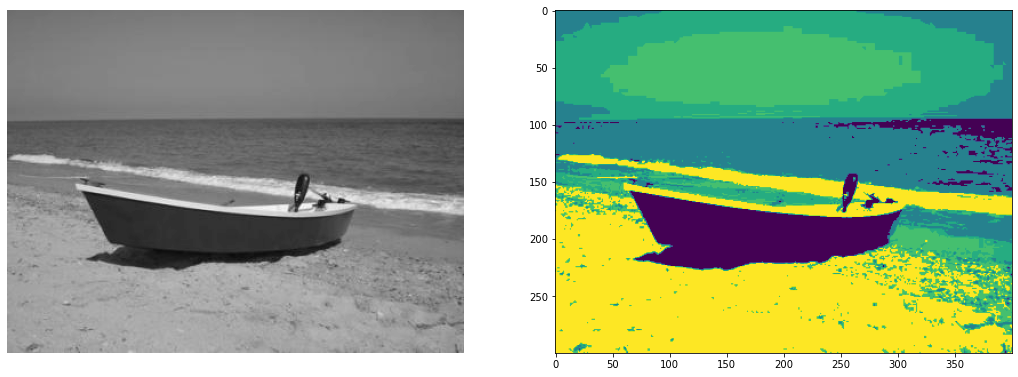

In [3]:
##Cargar imagen 
I = cv2.imread('im25.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
##### K-means algorithm
nf,nc=I.shape
I=I.ravel().astype(float)
K=5 # choose number of clusters
I=np.tile(I.reshape(len(I),1),(1,K))
m = [I[random.randint(0, len(I))][0] for i in range(K)]
m = np.array(m).reshape(1,K)
m_prev=m[:]
print("initials means ____")
print(*m.T)

for ite in range(50):
    dist=np.sqrt((I-m)**2)
    assig=np.argmin(dist,axis=1)
    for k in range(K):
        m[0,k]=np.mean(I[assig==k,0])
    if np.sum(np.abs(m_prev-m))<0.1:
        break
    m_prev=m[:]
print("Final means ____")
print(*m.T)


#Segmentation results 
I_seg=I[:,0]*1
for k in range(K):
        I_seg[assig==k]=m[0,k]
I_seg=I_seg.reshape(nf,nc).astype(int)  

fig1=plt.figure(figsize = (18,7))
a = fig1.add_subplot(1, 2, 1)
plt.imshow(I[:,0].reshape(nf,nc).astype(int), cmap='gray',vmin=0,vmax=255)
plt.axis('off');

B = fig1.add_subplot(1, 2, 2)
plt.imshow(I_seg)
plt.show()